In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
def extract_data_from_zip(zip_file_path, data_path):
    with zipfile.ZipFile(zip_file_path, 'r') as my_zip:
        my_zip.extractall(data_path)

In [3]:
df = pd.read_csv("data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## EXPLANATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df_cleared = df.dropna()
df_cleared.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
df_cleared.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
df_cleared.describe(include='object')

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


### What are the top 5 most selling video game in the world?

In [15]:
df_cleared.sort_values(by=['Global_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


They are Wii Sports, Super Mario Bros, Mario Kart Wii, Wii Sports Resort, Pokemon Red/Pokemon Blue. Noticeably, all 5 best seller video games are produced by Nintendo.

In [87]:
df_cleared.sort_values(by=['NA_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In the North America Region, one more time, Nintendo dominated the market because their video games occupy the place of top best selling games in the market.

In [88]:
df_cleared.sort_values(by=['EU_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


In Europe, along with Nintendo, somehow dominating again the market is the Publisher Take-Two Interactive. Nevertheless, the dominance of Nintendo in Europe is indeniable.

In [89]:
df_cleared.sort_values(by=['JP_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


### Evolution of Video games Industry

<Axes: title={'center': 'Games vs Years'}, xlabel='Number of games'>

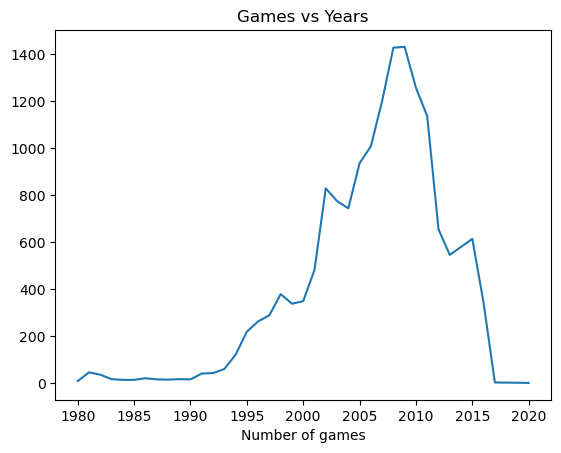

In [103]:
df_cleared['Year'].value_counts().sort_index().plot(kind='line', 
                                                    xlabel='Number of games', 
                                                    title='Games vs Years')

### Top 5 most frequent platform/publisher/genre of video games

<Axes: title={'center': 'Top 10 platforms'}, xlabel='Platform', ylabel='Number of Games'>

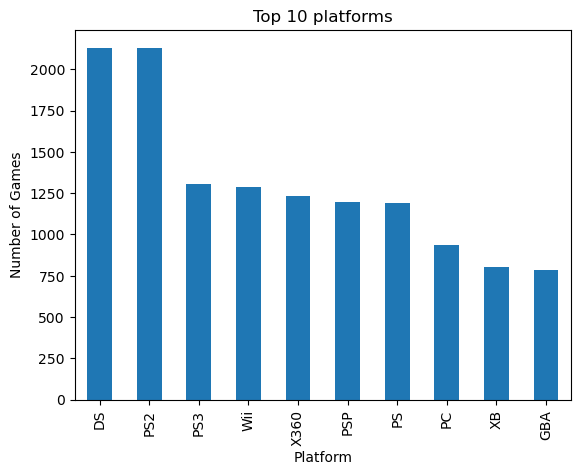

In [100]:
df_cleared['Platform'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                 ylabel='Number of Games',
                                                                                 title='Top 10 platforms')

<Axes: title={'center': 'Top 10 Genres'}, xlabel='Genre', ylabel='Number of Games'>

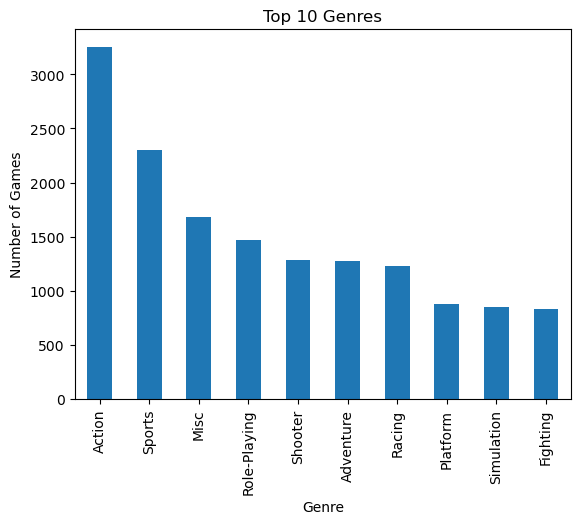

In [101]:
df_cleared['Genre'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                 ylabel='Number of Games',
                                                                                 title='Top 10 Genres')

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='Publisher', ylabel='Number of Games'>

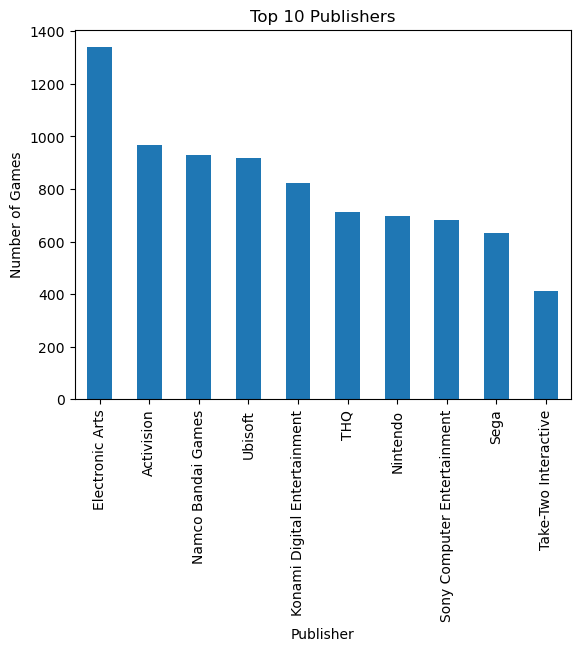

In [102]:
df_cleared['Publisher'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                 ylabel='Number of Games',
                                                                                 title='Top 10 Publishers')

<Axes: ylabel='Genre'>

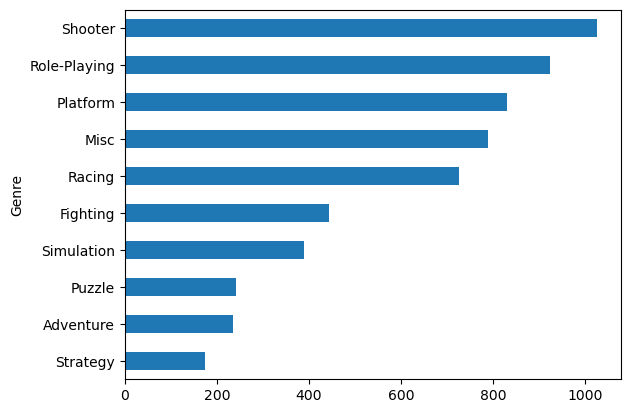

In [59]:
df_cleared.groupby(by=['Genre'])['Global_Sales'].sum().sort_values().head(10).plot(kind='barh')

<Axes: title={'center': 'Top 10 High Sales Publishers'}, xlabel='Publisher', ylabel='Global Sales'>

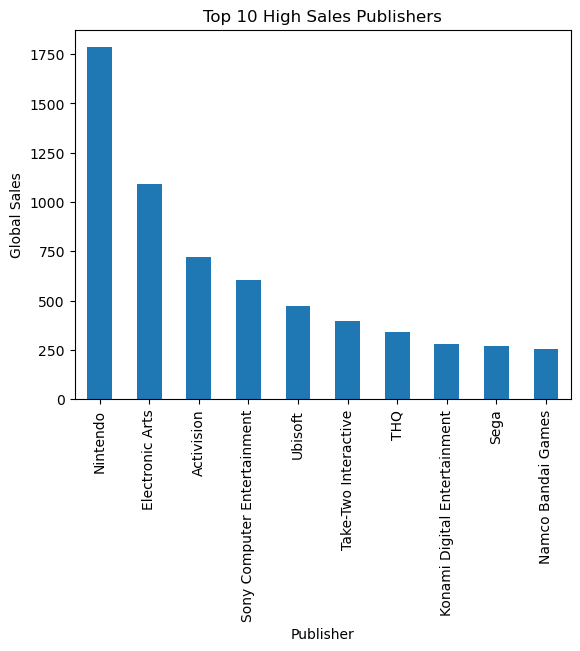

In [75]:
df_cleared.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', 
                                                                                                      title='Top 10 High Sales Publishers',
                                                                                                      ylabel='Global Sales')

<Axes: title={'center': 'Top 10 most frequent Publishers'}, xlabel='Total number of games', ylabel='Publisher'>

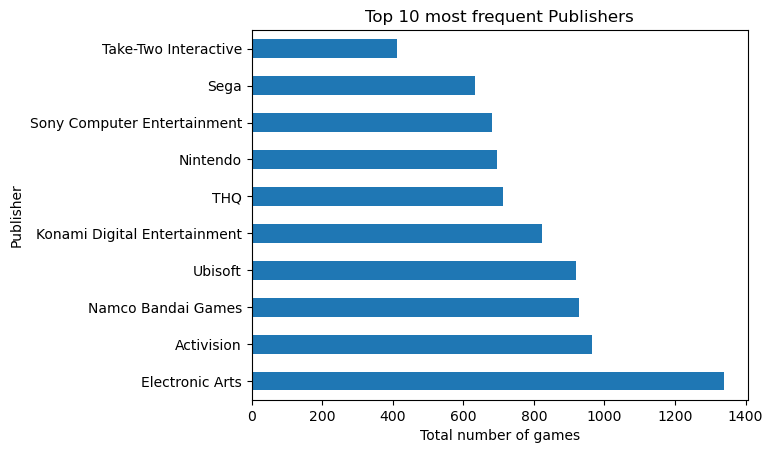

In [76]:
df_cleared['Publisher'].value_counts().head(10).plot(kind='barh', 
                                                     xlabel='Total number of games',
                                                     title='Top 10 most frequent Publishers')

<Axes: xlabel='Genre,Publisher'>

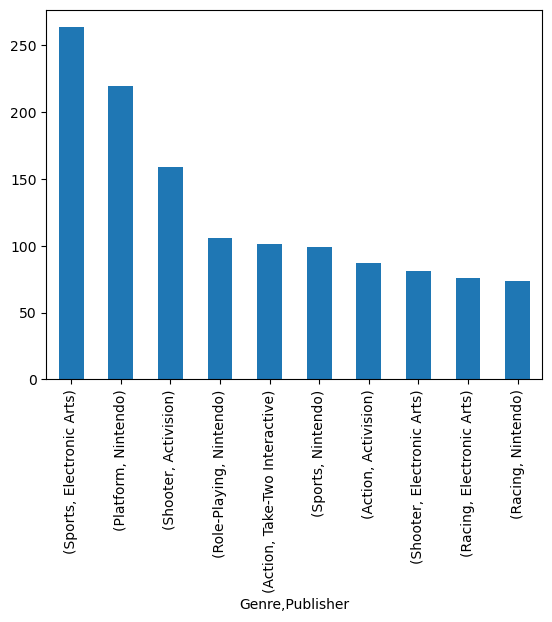

In [86]:
df_cleared.groupby(by=['Genre', 'Publisher'])['NA_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')